Class 9,10 in ML

In [23]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling

In [54]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score,auc

In [3]:
Cust_Data=pd.read_excel('CustomersData.xlsx')
Disc_Co=pd.read_csv('Discount_Coupon.csv')
Mar_Sp=pd.read_csv('Marketing_Spend.csv')
On_Sales=pd.read_csv('Online_Sales.csv')
Tax_Amt=pd.read_excel('Tax_amount.xlsx')

In [4]:
Cust_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [5]:
Disc_Co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              204 non-null    object
 1   Product_Category   204 non-null    object
 2   Coupon_Code        204 non-null    object
 3   Discount_pct       204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [6]:
Mar_Sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [7]:
On_Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  int64  
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.0+ MB


In [8]:
Tax_Amt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


# <h3><center>Understanding the Data

In [9]:
On_Sales.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status'],
      dtype='object')

In [10]:
Disc_Co.columns

Index(['Month', 'Product_Category ', 'Coupon_Code', 'Discount_pct'], dtype='object')

In [11]:
OnlineSales_Coup=On_Sales.merge(Disc_Co,left_on='Product_Category',right_on='Product_Category ',how='inner')

In [12]:
Tax_Amt.columns

Index(['Product_Category', 'GST'], dtype='object')

In [13]:
OnlineSales_Coup=OnlineSales_Coup.drop(columns='Product_Category ')

In [14]:
OnlineSales_Coup_Tax=OnlineSales_Coup.merge(Tax_Amt,left_on='Product_Category',right_on='Product_Category',how='inner')

In [15]:
OnlineSales_Coup_Tax['Invoice_Value']=((OnlineSales_Coup_Tax['Quantity']*OnlineSales_Coup_Tax['Avg_Price'])*(100-OnlineSales_Coup_Tax['Discount_pct'])*(1+OnlineSales_Coup_Tax['GST']))+OnlineSales_Coup_Tax['Delivery_Charges']

In [16]:
OnlineSales_Coup_Tax.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice_Value
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10,0.1,15223.79
1,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Feb,ELEC20,20,0.1,13532.98
2,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Mar,ELEC30,30,0.1,11842.17
3,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Apr,ELEC10,10,0.1,15223.79
4,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,May,ELEC20,20,0.1,13532.98


<h3><center>Data Merging

In [17]:
df=OnlineSales_Coup_Tax.merge(Cust_Data,left_on='CustomerID',right_on='CustomerID',how='inner')

In [18]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'GST', 'Invoice_Value', 'Gender', 'Location',
       'Tenure_Months'],
      dtype='object')

In [19]:
df['New_Transaction_Date']=pd.to_datetime(df['Transaction_Date'],format='%Y%m%d')

In [20]:
df

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Invoice_Value,Gender,Location,Tenure_Months,New_Transaction_Date
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10,0.10,15223.790,M,Chicago,12,2019-01-01
1,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Feb,ELEC20,20,0.10,13532.980,M,Chicago,12,2019-01-01
2,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Mar,ELEC30,30,0.10,11842.170,M,Chicago,12,2019-01-01
3,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Apr,ELEC10,10,0.10,15223.790,M,Chicago,12,2019-01-01
4,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,May,ELEC20,20,0.10,13532.980,M,Chicago,12,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,16333,47144,20191216,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Aug,NE20,20,0.05,20985.500,F,New York,41,2019-12-16
630284,16333,47144,20191216,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Sep,NE30,30,0.05,18363.125,F,New York,41,2019-12-16
630285,16333,47144,20191216,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Oct,NE10,10,0.05,23607.875,F,New York,41,2019-12-16
630286,16333,47144,20191216,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Nov,NE20,20,0.05,20985.500,F,New York,41,2019-12-16


In [21]:
df['Trans_Month']=df['New_Transaction_Date'].dt.month_name(locale='English')
df['Trans_Year']=df['New_Transaction_Date'].dt.year
df['Trans_Week']=df['New_Transaction_Date'].dt.weekofyear
df['Trans_Day']=df['New_Transaction_Date'].dt.dayofyear
df

C:\Users\VVLG\AppData\Local\Temp/ipykernel_19476/2494900226.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Trans_Week']=df['New_Transaction_Date'].dt.weekofyear


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,GST,Invoice_Value,Gender,Location,Tenure_Months,New_Transaction_Date,Trans_Month,Trans_Year,Trans_Week,Trans_Day
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,15223.790,M,Chicago,12,2019-01-01,January,2019,1,1
1,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,13532.980,M,Chicago,12,2019-01-01,January,2019,1,1
2,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,11842.170,M,Chicago,12,2019-01-01,January,2019,1,1
3,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,15223.790,M,Chicago,12,2019-01-01,January,2019,1,1
4,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,13532.980,M,Chicago,12,2019-01-01,January,2019,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,16333,47144,20191216,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,...,0.05,20985.500,F,New York,41,2019-12-16,December,2019,51,350
630284,16333,47144,20191216,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,...,0.05,18363.125,F,New York,41,2019-12-16,December,2019,51,350
630285,16333,47144,20191216,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,...,0.05,23607.875,F,New York,41,2019-12-16,December,2019,51,350
630286,16333,47144,20191216,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,...,0.05,20985.500,F,New York,41,2019-12-16,December,2019,51,350


In [22]:
df1=df
df1=df1.drop(columns='Transaction_Date')
df1

,CustomerID,Transaction_ID,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,...,GST,Invoice_Value,Gender,Location,Tenure_Months,New_Transaction_Date,Trans_Month,Trans_Year,Trans_Week,Trans_Day
0,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,...,0.10,15223.790,M,Chicago,12,2019-01-01,January,2019,1,1
1,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Feb,...,0.10,13532.980,M,Chicago,12,2019-01-01,January,2019,1,1
2,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Mar,...,0.10,11842.170,M,Chicago,12,2019-01-01,January,2019,1,1
3,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Apr,...,0.10,15223.790,M,Chicago,12,2019-01-01,January,2019,1,1
4,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,May,...,0.10,13532.980,M,Chicago,12,2019-01-01,January,2019,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Aug,...,0.05,20985.500,F,New York,41,2019-12-16,December,2019,51,350
630284,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Sep,...,0.05,18363.125,F,New York,41,2019-12-16,December,2019,51,350
630285,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Oct,...,0.05,23607.875,F,New York,41,2019-12-16,December,2019,51,350
630286,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Nov,...,0.05,20985.500,F,New York,41,2019-12-16,December,2019,51,350


In [23]:
df1.columns

Index(['CustomerID', 'Transaction_ID', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'Month', 'Coupon_Code', 'Discount_pct', 'GST',
       'Invoice_Value', 'Gender', 'Location', 'Tenure_Months',
       'New_Transaction_Date', 'Trans_Month', 'Trans_Year', 'Trans_Week',
       'Trans_Day'],
      dtype='object')

In [24]:
df1=df.rename(columns={'Month':'Coupon_Month'})

In [25]:
df1=df1.drop(columns=['Transaction_Date'])

In [26]:
df1.head()

,CustomerID,Transaction_ID,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Coupon_Month,...,GST,Invoice_Value,Gender,Location,Tenure_Months,New_Transaction_Date,Trans_Month,Trans_Year,Trans_Week,Trans_Day
0,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,...,0.1,15223.79,M,Chicago,12,2019-01-01,January,2019,1,1
1,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Feb,...,0.1,13532.98,M,Chicago,12,2019-01-01,January,2019,1,1
2,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Mar,...,0.1,11842.17,M,Chicago,12,2019-01-01,January,2019,1,1
3,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Apr,...,0.1,15223.79,M,Chicago,12,2019-01-01,January,2019,1,1
4,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,May,...,0.1,13532.98,M,Chicago,12,2019-01-01,January,2019,1,1


<h3>How many customers are acquired every month

In [27]:
Cust_Every_Month=df1

Cust_Every_Month=Cust_Every_Month.CustomerID.drop_duplicates(keep='first')

In [28]:
Cust_Every_Month

,CustomerID,Transaction_ID,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Coupon_Month,...,GST,Invoice_Value,Gender,Location,Tenure_Months,New_Transaction_Date,Trans_Month,Trans_Year,Trans_Week,Trans_Day
0,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,...,0.10,15223.790,M,Chicago,12,2019-01-01,January,2019,1,1
1,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Feb,...,0.10,13532.980,M,Chicago,12,2019-01-01,January,2019,1,1
2,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Mar,...,0.10,11842.170,M,Chicago,12,2019-01-01,January,2019,1,1
3,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Apr,...,0.10,15223.790,M,Chicago,12,2019-01-01,January,2019,1,1
4,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,May,...,0.10,13532.980,M,Chicago,12,2019-01-01,January,2019,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Aug,...,0.05,20985.500,F,New York,41,2019-12-16,December,2019,51,350
630284,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Sep,...,0.05,18363.125,F,New York,41,2019-12-16,December,2019,51,350
630285,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Oct,...,0.05,23607.875,F,New York,41,2019-12-16,December,2019,51,350
630286,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Nov,...,0.05,20985.500,F,New York,41,2019-12-16,December,2019,51,350


In [29]:
Cust_Every_Month=Cust_Every_Month.drop_duplicates('CustomerID').groupby(['Trans_Year','Trans_Month'])['CustomerID'].count()

Trans_Year  Trans_Month
2019        April          155
            August         144
            December       115
            February        89
            January        200
            July            96
            June           138
            March          159
            May            109
            November        79
            October         96
            September       88
Name: CustomerID, dtype: int64


<AxesSubplot:xlabel='Trans_Year,Trans_Month'>

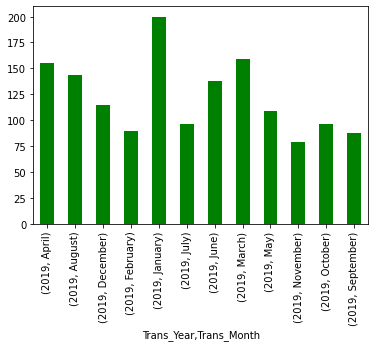

In [30]:
print(Cust_Every_Month)
Cust_Every_Month.plot(kind='bar',color='green')

<h3>Understanding the retention of customers month on month basis.

In [31]:
Cust_reten=df1

In [32]:
Cust_reten=Cust_reten.groupby(['Trans_Year','Trans_Month','CustomerID'])[['Discount_pct','Invoice_Value']].sum()

In [33]:
Cust_reten.sort_values('Discount_pct',ascending=False)

Discount_pct  Invoice_Value
Trans_Year Trans_Month CustomerID                             
2019       January     17850              70320   3.685882e+07
           December    17337              62400   3.781869e+07
           April       12748              54000   4.080332e+07
           March       12748              43440   1.410658e+07
                       13174              40320   1.503128e+07
...                                         ...            ...
           November    15596                240   8.349600e+04
           July        15562                240   8.349600e+04
           November    15497                240   1.736832e+04
           July        15602                240   4.536734e+04
           September   18233                240   1.051440e+05

[2577 rows x 2 columns]

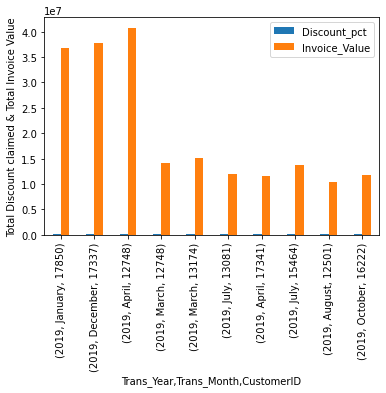

In [34]:
Cust_reten.sort_values('Discount_pct',ascending=False).head(10).plot(kind='bar')
plt.xlabel('Trans_Year,Trans_Month,CustomerID')
plt.ylabel('Total Discount claimed & Total Invoice Value')
plt.show()

<h3><center><font color=Dark Blue>The reason why the customers are staying is becuase of the discount amount they are claiming. Those are the people who are likely to spend more.

In [35]:
Disc_vs_Revenue=df1

In [36]:
Disc_vs_Revenue=Disc_vs_Revenue.groupby('Discount_pct')['Invoice_Value'].mean()

In [37]:
Disc_vs_Revenue

Discount_pct
10    8843.118497
20    7861.713877
30    6880.309258
Name: Invoice_Value, dtype: float64

In [38]:
df1.Discount_pct.corr(df.Invoice_Value)

-0.055148244987563676

<h4><font color=Dark Blue>The above proves that there is not much relationship between Discount and Revenue

<h3>Analyzing certain KIPs

In [39]:
# Top 10 weeks with max orders

In [40]:
df1

,CustomerID,Transaction_ID,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Coupon_Month,...,GST,Invoice_Value,Gender,Location,Tenure_Months,New_Transaction_Date,Trans_Month,Trans_Year,Trans_Week,Trans_Day
0,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,...,0.10,15223.790,M,Chicago,12,2019-01-01,January,2019,1,1
1,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Feb,...,0.10,13532.980,M,Chicago,12,2019-01-01,January,2019,1,1
2,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Mar,...,0.10,11842.170,M,Chicago,12,2019-01-01,January,2019,1,1
3,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Apr,...,0.10,15223.790,M,Chicago,12,2019-01-01,January,2019,1,1
4,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,May,...,0.10,13532.980,M,Chicago,12,2019-01-01,January,2019,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Aug,...,0.05,20985.500,F,New York,41,2019-12-16,December,2019,51,350
630284,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Sep,...,0.05,18363.125,F,New York,41,2019-12-16,December,2019,51,350
630285,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Oct,...,0.05,23607.875,F,New York,41,2019-12-16,December,2019,51,350
630286,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Nov,...,0.05,20985.500,F,New York,41,2019-12-16,December,2019,51,350


Trans_Week
31    18108
29    16704
32    16560
33    16116
35    15780
34    15588
28    15456
50    15096
49    15072
30    14700
Name: Transaction_ID, dtype: int64


<AxesSubplot:xlabel='Trans_Week'>

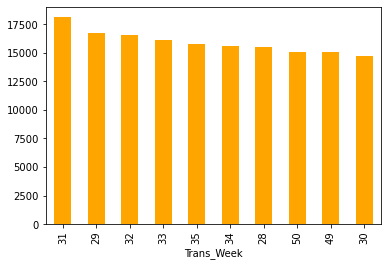

In [41]:
orders_week=df1
orders_week=orders_week.groupby('Trans_Week')['Transaction_ID'].count()
print(orders_week.sort_values(ascending=False).head(10))
orders_week.sort_values(ascending=False).head(10).plot(kind='bar',color='orange')

In [42]:
# Quantity by category, month and week

Product_Category
Office                  1060596
Apparel                  389256
Drinkware                366012
Lifestyle                298572
Nest-USA                 257160
Bags                     183276
Notebooks & Journals     114672
Headgear                  42396
Nest                      34044
Housewares                29808
Bottles                   25080
Waze                      13728
Accessories               13164
Nest-Canada                5628
Gift Cards                 2472
Android                     540
Name: Quantity, dtype: int64


<AxesSubplot:xlabel='Product_Category'>

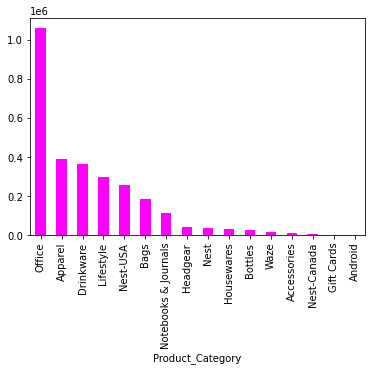

In [43]:
Qty_Cat=df1
Qty_Cat=Qty_Cat.groupby('Product_Category')['Quantity'].sum()
print(Qty_Cat.sort_values(ascending=False))
Qty_Cat.sort_values(ascending=False).plot(kind='bar',color='Magenta')

In [44]:
# Quantity by month

Trans_Month
August       328548
April        299064
July         271356
June         257784
March        246516
January      239844
September    231948
May          222228
October      208800
February     196920
November     181392
December     152004
Name: Quantity, dtype: int64


<AxesSubplot:xlabel='Trans_Month'>

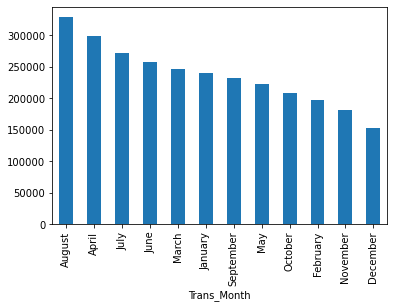

In [45]:
Qty_Mon=df1
Qty_Mon=Qty_Mon.groupby('Trans_Month')['Quantity'].sum()
print(Qty_Mon.sort_values(ascending=False))
Qty_Mon.sort_values(ascending=False).plot(kind='bar')

In [46]:
# Quantity by week (Top 10)

Trans_Week
31    113388
14     99036
24     94476
16     82068
29     79776
34     77532
1      71244
23     69444
37     67824
30     66456
Name: Quantity, dtype: int64


<AxesSubplot:xlabel='Trans_Week'>

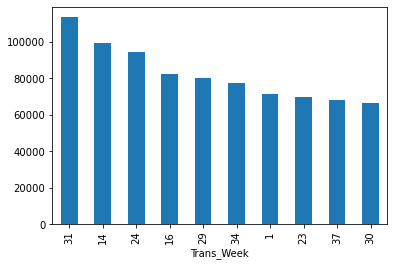

In [47]:
Qty_Week=df1
Qty_Week=Qty_Week.groupby('Trans_Week')['Quantity'].sum()
print(Qty_Week.sort_values(ascending=False).head(10))
Qty_Week.sort_values(ascending=False).head(10).plot(kind='bar')

In [48]:
df1

,CustomerID,Transaction_ID,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Coupon_Month,...,GST,Invoice_Value,Gender,Location,Tenure_Months,New_Transaction_Date,Trans_Month,Trans_Year,Trans_Week,Trans_Day
0,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,...,0.10,15223.790,M,Chicago,12,2019-01-01,January,2019,1,1
1,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Feb,...,0.10,13532.980,M,Chicago,12,2019-01-01,January,2019,1,1
2,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Mar,...,0.10,11842.170,M,Chicago,12,2019-01-01,January,2019,1,1
3,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Apr,...,0.10,15223.790,M,Chicago,12,2019-01-01,January,2019,1,1
4,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,May,...,0.10,13532.980,M,Chicago,12,2019-01-01,January,2019,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Aug,...,0.05,20985.500,F,New York,41,2019-12-16,December,2019,51,350
630284,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Sep,...,0.05,18363.125,F,New York,41,2019-12-16,December,2019,51,350
630285,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Oct,...,0.05,23607.875,F,New York,41,2019-12-16,December,2019,51,350
630286,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Nov,...,0.05,20985.500,F,New York,41,2019-12-16,December,2019,51,350


<center><h3>Heuristic Segmentation<br><br><center>Value Based

In [49]:
RFM_Freq=df1
RFM_Freq=RFM_Freq.groupby('CustomerID')['Transaction_ID'].count()
RFM_Freq

CustomerID
12346      24
12347     708
12348     276
12350     204
12356     432
         ... 
18259      72
18260     468
18269      96
18277      12
18283    1212
Name: Transaction_ID, Length: 1468, dtype: int64

In [50]:
RFM_Rec=df1
RFM_Rec=RFM_Rec.groupby('CustomerID')['Trans_Day'].max()
RFM_Rec

CustomerID
12346    258
12347    306
12348    292
12350    348
12356    258
        ... 
18259     95
18260    278
18269    171
18277    296
18283    283
Name: Trans_Day, Length: 1468, dtype: int64

In [51]:
RFM_Mon=df1
RFM_Mon=RFM_Mon.groupby('CustomerID')['Invoice_Value'].sum()
RFM_Mon=round(RFM_Mon,2)
RFM_Mon

CustomerID
12346       36060.67
12347    15250965.12
12348     1582257.77
12350     1449535.39
12356     1538110.49
            ...     
18259      555073.80
18260     2488965.46
18269      115420.94
18277      314760.00
18283     6660352.37
Name: Invoice_Value, Length: 1468, dtype: float64

In [52]:
df1.columns

Index(['CustomerID', 'Transaction_ID', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'Coupon_Month', 'Coupon_Code', 'Discount_pct', 'GST',
       'Invoice_Value', 'Gender', 'Location', 'Tenure_Months',
       'New_Transaction_Date', 'Trans_Month', 'Trans_Year', 'Trans_Week',
       'Trans_Day'],
      dtype='object')

In [53]:
RFM_Other_Qty=df1
RFM_Other_Qty=RFM_Other_Qty.groupby('CustomerID')['Quantity'].sum()
RFM_Other_Qty

CustomerID
12346      36
12347    4080
12348    2508
12350     252
12356     672
         ... 
18259     540
18260    1536
18269     120
18277      24
18283    1812
Name: Quantity, Length: 1468, dtype: int64

In [54]:
RFM_Values=pd.concat([pd.Series(RFM_Rec),pd.Series(RFM_Freq),pd.Series(RFM_Mon),pd.Series(RFM_Other_Qty)],axis=1)
RFM_Values.rename(columns={'Trans_Day':'Recency',
                          'Transaction_ID':'Frequency',
                          'Invoice_Value':'Monetary'},inplace=True)
RFM_Values

,Recency,Frequency,Monetary,Quantity
CustomerID,,,,
12346,258,24,36060.67,36
12347,306,708,15250965.12,4080
12348,292,276,1582257.77,2508
12350,348,204,1449535.39,252
12356,258,432,1538110.49,672
...,...,...,...,...
18259,95,72,555073.80,540
18260,278,468,2488965.46,1536
18269,171,96,115420.94,120


In [55]:
RFM_Values['Decile']=pd.qcut(RFM_Values['Monetary'], 10, labels=False)
RFM_Values

,Recency,Frequency,Monetary,Quantity,Decile
CustomerID,,,,,
12346,258,24,36060.67,36,0
12347,306,708,15250965.12,4080,9
12348,292,276,1582257.77,2508,4
12350,348,204,1449535.39,252,4
12356,258,432,1538110.49,672,4
...,...,...,...,...,...
18259,95,72,555073.80,540,2
18260,278,468,2488965.46,1536,5
18269,171,96,115420.94,120,0


In [56]:
# Key performace variable selection
col_kpi=['Monetary','Recency','Frequency','Quantity']

In [57]:
#Profiling
VB_Profiling=RFM_Values.groupby(['Decile']).apply(lambda x: round(x[col_kpi].mean(),2))
VB_Profiling2=VB_Profiling.T
VB_Profiling2

Decile,0,1,2,3,4,5,6,7,8,9
Monetary,69740.52,353129.42,709240.39,1080084.77,1580318.50,2192037.77,3020298.81,4193157.33,6270697.93,14267650.33
Recency,176.32,193.99,205.84,206.73,201.47,218.14,251.77,234.29,234.70,283.95
Frequency,33.88,94.45,141.06,175.32,228.16,296.98,406.27,547.35,773.06,1595.10
Quantity,69.14,314.61,389.22,661.07,876.24,1207.76,1850.55,2414.69,3297.71,8231.35


<H3><center>Heuristic Segmentation<br><br><center>RFM

In [58]:
RFM_DF=RFM_Values
RFM_DF

,Recency,Frequency,Monetary,Quantity,Decile
CustomerID,,,,,
12346,258,24,36060.67,36,0
12347,306,708,15250965.12,4080,9
12348,292,276,1582257.77,2508,4
12350,348,204,1449535.39,252,4
12356,258,432,1538110.49,672,4
...,...,...,...,...,...
18259,95,72,555073.80,540,2
18260,278,468,2488965.46,1536,5
18269,171,96,115420.94,120,0


In [59]:
# Understanding the quantiles of the data

quantiles = RFM_DF[['Frequency','Monetary','Recency' ]].quantile(q=[0.25,0.5,0.75])
quantiles.Monetary=round(quantiles.Monetary,2)
quantiles

,Frequency,Monetary,Recency
0.25,120.0,699101.27,145.0
0.50,252.0,1849442.14,234.0
0.75,540.0,4195980.86,310.0


In [60]:
# Assigning quantiles values

quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 120.0, 0.5: 252.0, 0.75: 540.0},
 'Monetary': {0.25: 699101.27, 0.5: 1849442.14, 0.75: 4195980.86},
 'Recency': {0.25: 145.0, 0.5: 234.0, 0.75: 310.0}}

In [61]:
# Functions for fitting quantile values

def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [62]:
RFM_DF['R_Quartile'] = RFM_DF['Recency'].apply(RClass, args=('Recency',quantiles,))
RFM_DF['F_Quartile'] = RFM_DF['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
RFM_DF['M_Quartile'] = RFM_DF['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

In [63]:
RFM_DF

,Recency,Frequency,Monetary,Quantity,Decile,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,,,
12346,258,24,36060.67,36,0,3,4,4
12347,306,708,15250965.12,4080,9,3,1,1
12348,292,276,1582257.77,2508,4,3,2,3
12350,348,204,1449535.39,252,4,4,3,3
12356,258,432,1538110.49,672,4,3,2,3
...,...,...,...,...,...,...,...,...
18259,95,72,555073.80,540,2,1,4,4
18260,278,468,2488965.46,1536,5,3,2,2
18269,171,96,115420.94,120,0,2,4,4


In [64]:
RFM_DF=RFM_DF.assign(R_seg=np.nan, FM_seg =np.nan)
RFM_DF.R_seg[RFM_DF['R_Quartile']==4] = "4. Churn"
RFM_DF.R_seg[RFM_DF['R_Quartile']==2] = "3. At Risk"
RFM_DF.R_seg[RFM_DF['R_Quartile']==3] = "2. Less Active"
RFM_DF.R_seg[RFM_DF['R_Quartile']==1] = "1. Active"

RFM_DF.FM_seg[(RFM_DF['F_Quartile']==3) & (RFM_DF['M_Quartile']==1)] = "2.Gold"
RFM_DF.FM_seg[(RFM_DF['F_Quartile']==4) & (RFM_DF['M_Quartile']==1)] = "2.Gold"
RFM_DF.FM_seg[(RFM_DF['F_Quartile']==2) & (RFM_DF['M_Quartile']==2)] = "2.Gold"
RFM_DF.FM_seg[(RFM_DF['F_Quartile']==2) & (RFM_DF['M_Quartile']==1)] = "2.Gold"
RFM_DF.FM_seg[(RFM_DF['F_Quartile']==3) & (RFM_DF['M_Quartile']==2)] = "2.Gold"
RFM_DF.FM_seg[(RFM_DF['F_Quartile']==4) & (RFM_DF['M_Quartile']==2)] = "1.Silver"
RFM_DF.FM_seg[(RFM_DF['F_Quartile']==1) & (RFM_DF['M_Quartile']==3)] = "2.Gold"
RFM_DF.FM_seg[(RFM_DF['F_Quartile']==2) & (RFM_DF['M_Quartile']==3)] = "2.Gold"
RFM_DF.FM_seg[(RFM_DF['F_Quartile']==3) & (RFM_DF['M_Quartile']==3)] = "1.Silver"
RFM_DF.FM_seg[(RFM_DF['F_Quartile']==4) & (RFM_DF['M_Quartile']==3)] = "1.Silver"
RFM_DF.FM_seg[(RFM_DF['F_Quartile']==1) & (RFM_DF['M_Quartile']==4)] = "2.Gold"
RFM_DF.FM_seg[(RFM_DF['F_Quartile']==1) & (RFM_DF['M_Quartile']==2)] = "2.Gold"
RFM_DF.FM_seg[(RFM_DF['F_Quartile']==2) & (RFM_DF['M_Quartile']==4)] = "1.Silver"
RFM_DF.FM_seg[(RFM_DF['F_Quartile']==3) & (RFM_DF['M_Quartile']==4)] = "1.Silver"
RFM_DF.FM_seg[(RFM_DF['F_Quartile']==4) & (RFM_DF['M_Quartile']==4)] = "0.Standard"

RFM_DF.FM_seg.fillna("4.Premium", inplace=True)

C:\Users\VVLG\AppData\Local\Temp/ipykernel_11136/671899261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_DF.R_seg[RFM_DF['R_Quartile']==4] = "4. Churn"
C:\Users\VVLG\AppData\Local\Temp/ipykernel_11136/671899261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_DF.R_seg[RFM_DF['R_Quartile']==2] = "3. At Risk"
C:\Users\VVLG\AppData\Local\Temp/ipykernel_11136/671899261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RF

In [65]:
RFM_DF

,Recency,Frequency,Monetary,Quantity,Decile,R_Quartile,F_Quartile,M_Quartile,R_seg,FM_seg
CustomerID,,,,,,,,,,
12346,258,24,36060.67,36,0,3,4,4,2. Less Active,0.Standard
12347,306,708,15250965.12,4080,9,3,1,1,2. Less Active,4.Premium
12348,292,276,1582257.77,2508,4,3,2,3,2. Less Active,2.Gold
12350,348,204,1449535.39,252,4,4,3,3,4. Churn,1.Silver
12356,258,432,1538110.49,672,4,3,2,3,2. Less Active,2.Gold
...,...,...,...,...,...,...,...,...,...,...
18259,95,72,555073.80,540,2,1,4,4,1. Active,0.Standard
18260,278,468,2488965.46,1536,5,3,2,2,2. Less Active,2.Gold
18269,171,96,115420.94,120,0,2,4,4,3. At Risk,0.Standard


In [66]:
# Key performace variable selection and profiling
col_kpi=['Monetary','Recency','Frequency','Quantity']
Profiling=RFM_DF.groupby(['R_seg', 'FM_seg']).apply(lambda x: round(x[col_kpi].mean(),2)).T
Profiling

R_seg      1. Active                                     2. Less Active  \
FM_seg    0.Standard    1.Silver      2.Gold   4.Premium     0.Standard   
Monetary   225809.30  1085778.60  2790979.23  7912059.76      257474.84   
Recency        76.96       75.56       85.01       67.31         270.87   
Frequency      43.18      154.33      370.77      933.06          54.89   
Quantity      192.00      568.11     1786.77     5472.73         192.00   

R_seg                                         3. At Risk              \
FM_seg       1.Silver      2.Gold   4.Premium 0.Standard    1.Silver   
Monetary   1065271.23  3105572.19  9647252.13  231659.43  1025961.95   
Recency        272.24      273.89      275.07     195.87      193.07   
Frequency      155.46      423.69     1201.36      55.71      169.60   
Quantity       742.11     1691.06     5246.18     159.54      725.83   

R_seg                               4. Churn                          \
FM_seg         2.Gold   4.Premium 0.Standard    1.Silver      2.Gold   
Monetary   2629702.11  7018291.70  315851.59  1137988.95  3200550.14   
Recency        193.59      195.91     342.81      341.93      338.87   
Frequency      407.60     1062.13      51.00      147.21      350.94   
Quantity      1673.55     5009.62     154.88      401.24     1367.50   

R_seg                   
FM_seg       4.Premium  
Monetary   12103337.64  
Recency         338.63  
Frequency      1359.20  
Quantity       6550.00

### <h2><CENTER>SCIENTIFIC SEGMENTATION

In [67]:
pd.options.display.max_columns=None
display(df1)

,CustomerID,Transaction_ID,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Coupon_Month,Coupon_Code,Discount_pct,GST,Invoice_Value,Gender,Location,Tenure_Months,New_Transaction_Date,Trans_Month,Trans_Year,Trans_Week,Trans_Day
0,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10,0.10,15223.790,M,Chicago,12,2019-01-01,January,2019,1,1
1,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Feb,ELEC20,20,0.10,13532.980,M,Chicago,12,2019-01-01,January,2019,1,1
2,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Mar,ELEC30,30,0.10,11842.170,M,Chicago,12,2019-01-01,January,2019,1,1
3,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Apr,ELEC10,10,0.10,15223.790,M,Chicago,12,2019-01-01,January,2019,1,1
4,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,May,ELEC20,20,0.10,13532.980,M,Chicago,12,2019-01-01,January,2019,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Aug,NE20,20,0.05,20985.500,F,New York,41,2019-12-16,December,2019,51,350
630284,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Sep,NE30,30,0.05,18363.125,F,New York,41,2019-12-16,December,2019,51,350
630285,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Oct,NE10,10,0.05,23607.875,F,New York,41,2019-12-16,December,2019,51,350
630286,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Nov,NE20,20,0.05,20985.500,F,New York,41,2019-12-16,December,2019,51,350


In [68]:
df2=df1
pd.options.display.max_columns=None
display(df2)

,CustomerID,Transaction_ID,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Coupon_Month,Coupon_Code,Discount_pct,GST,Invoice_Value,Gender,Location,Tenure_Months,New_Transaction_Date,Trans_Month,Trans_Year,Trans_Week,Trans_Day
0,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10,0.10,15223.790,M,Chicago,12,2019-01-01,January,2019,1,1
1,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Feb,ELEC20,20,0.10,13532.980,M,Chicago,12,2019-01-01,January,2019,1,1
2,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Mar,ELEC30,30,0.10,11842.170,M,Chicago,12,2019-01-01,January,2019,1,1
3,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Apr,ELEC10,10,0.10,15223.790,M,Chicago,12,2019-01-01,January,2019,1,1
4,17850,16679,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,May,ELEC20,20,0.10,13532.980,M,Chicago,12,2019-01-01,January,2019,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Aug,NE20,20,0.05,20985.500,F,New York,41,2019-12-16,December,2019,51,350
630284,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Sep,NE30,30,0.05,18363.125,F,New York,41,2019-12-16,December,2019,51,350
630285,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Oct,NE10,10,0.05,23607.875,F,New York,41,2019-12-16,December,2019,51,350
630286,16333,47144,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,Nov,NE20,20,0.05,20985.500,F,New York,41,2019-12-16,December,2019,51,350


In [69]:
df2.columns

Index(['CustomerID', 'Transaction_ID', 'Product_SKU', 'Product_Description',
       'Product_Category', 'Quantity', 'Avg_Price', 'Delivery_Charges',
       'Coupon_Status', 'Coupon_Month', 'Coupon_Code', 'Discount_pct', 'GST',
       'Invoice_Value', 'Gender', 'Location', 'Tenure_Months',
       'New_Transaction_Date', 'Trans_Month', 'Trans_Year', 'Trans_Week',
       'Trans_Day'],
      dtype='object')

<h3><center>Data Manipulation

In [70]:
df2.drop(columns=['CustomerID', 'Transaction_ID','GST','New_Transaction_Date','Trans_Year','Trans_Week','Trans_Day','Avg_Price', 'Delivery_Charges','Coupon_Status', 'Coupon_Month',],inplace=True)

In [71]:
df2.head()

,Product_SKU,Product_Description,Product_Category,Quantity,Coupon_Code,Discount_pct,Invoice_Value,Gender,Location,Tenure_Months,Trans_Month
0,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,ELEC10,10,15223.79,M,Chicago,12,January
1,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,ELEC20,20,13532.98,M,Chicago,12,January
2,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,ELEC30,30,11842.17,M,Chicago,12,January
3,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,ELEC10,10,15223.79,M,Chicago,12,January
4,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,ELEC20,20,13532.98,M,Chicago,12,January


In [72]:
df2.columns

Index(['Product_SKU', 'Product_Description', 'Product_Category', 'Quantity',
       'Coupon_Code', 'Discount_pct', 'Invoice_Value', 'Gender', 'Location',
       'Tenure_Months', 'Trans_Month'],
      dtype='object')

In [73]:
le=LabelEncoder()

In [74]:
S_Seg_DF=df2

In [75]:
S_Seg_DF.Product_SKU=le.fit_transform(S_Seg_DF.Product_SKU)
S_Seg_DF.Product_Description=le.fit_transform(S_Seg_DF.Product_Description)
S_Seg_DF.Product_Category=le.fit_transform(S_Seg_DF.Product_Category)
S_Seg_DF.Coupon_Code=le.fit_transform(S_Seg_DF.Coupon_Code)
S_Seg_DF.Gender=le.fit_transform(S_Seg_DF.Gender)
S_Seg_DF=pd.get_dummies(S_Seg_DF,columns=['Location'], drop_first=True, prefix='Location')
S_Seg_DF.Trans_Month=le.fit_transform(S_Seg_DF.Trans_Month)

In [76]:
S_Seg_DF.head()

,Product_SKU,Product_Description,Product_Category,Quantity,Coupon_Code,Discount_pct,Invoice_Value,Gender,Tenure_Months,Trans_Month,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC
0,972,308,12,1,12,10,15223.79,1,12,4,1,0,0,0
1,972,308,12,1,13,20,13532.98,1,12,4,1,0,0,0
2,972,308,12,1,14,30,11842.17,1,12,4,1,0,0,0
3,972,308,12,1,12,10,15223.79,1,12,4,1,0,0,0
4,972,308,12,1,13,20,13532.98,1,12,4,1,0,0,0


<h3><center>Feature Reduction using PCA

In [256]:
for x in S_Seg_DF.columns:
    print(x)
    print(S_Seg_DF.corrwith(S_Seg_DF[x]))
    print('*******************************')

Product_SKU
Product_SKU               1.000000
Product_Description       0.537536
Product_Category          0.646860
Quantity                  0.059053
Coupon_Code              -0.495728
Discount_pct              0.000000
Invoice_Value             0.239529
Gender                    0.003614
Tenure_Months             0.000931
Trans_Month               0.031449
Location_Chicago          0.011755
Location_New Jersey      -0.006404
Location_New York        -0.010863
Location_Washington DC   -0.003968
dtype: float64
*******************************
Product_Description
Product_SKU               0.537536
Product_Description       1.000000
Product_Category          0.349353
Quantity                 -0.053825
Coupon_Code              -0.212688
Discount_pct              0.000000
Invoice_Value             0.225014
Gender                    0.008444
Tenure_Months             0.001087
Trans_Month               0.000994
Location_Chicago          0.003189
Location_New Jersey       0.000817
Location_Ne

In [257]:
S_Seg_DF.drop(columns=['Product_SKU'],inplace=True)

In [258]:
S_Seg_DF.apply(lambda x: x.std()/x.mean())

Product_Description       0.462779
Product_Category          0.646684
Quantity                  4.479787
Coupon_Code               0.480542
Discount_pct              0.408249
Invoice_Value             1.848221
Gender                    1.287829
Tenure_Months             0.515424
Trans_Month               0.646387
Location_Chicago          1.370988
Location_New Jersey       3.278773
Location_New York         1.932143
Location_Washington DC    4.288209
dtype: float64

In [259]:
S_Seg_DF=S_Seg_DF.rename(columns={'Location_New Jersey':'Location_New_Jersey','Location_New York':'Location_New_York','Location_Washington DC':'Location_Washington_DC'})

In [260]:
#standardize the data

sc = StandardScaler()
sc = sc.fit(S_Seg_DF)
S_Seg_DF_New = pd.DataFrame(sc.transform(S_Seg_DF), columns = S_Seg_DF.columns)
S_Seg_DF_New

,Product_Description,Product_Category,Quantity,Coupon_Code,Discount_pct,Invoice_Value,Gender,Tenure_Months,Trans_Month,Location_Chicago,Location_New_Jersey,Location_New_York,Location_Washington_DC
0,0.829816,0.899836,-0.173621,-1.153040,-1.224745,0.506675,1.287828,-1.049507,-0.395207,1.370987,-0.304992,-0.517560,-0.233198
1,0.829816,0.899836,-0.173621,-1.075712,0.000000,0.390310,1.287828,-1.049507,-0.395207,1.370987,-0.304992,-0.517560,-0.233198
2,0.829816,0.899836,-0.173621,-0.998383,1.224745,0.273944,1.287828,-1.049507,-0.395207,1.370987,-0.304992,-0.517560,-0.233198
3,0.829816,0.899836,-0.173621,-1.153040,-1.224745,0.506675,1.287828,-1.049507,-0.395207,1.370987,-0.304992,-0.517560,-0.233198
4,0.829816,0.899836,-0.173621,-1.075712,0.000000,0.390310,1.287828,-1.049507,-0.395207,1.370987,-0.304992,-0.517560,-0.233198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,0.800686,0.492138,0.024793,0.316205,0.000000,0.903209,-0.776501,1.102887,-0.971135,-0.729402,-0.304992,1.932142,-0.233198
630284,0.800686,0.492138,0.024793,0.393534,1.224745,0.722731,-0.776501,1.102887,-0.971135,-0.729402,-0.304992,1.932142,-0.233198
630285,0.800686,0.492138,0.024793,0.238876,-1.224745,1.083687,-0.776501,1.102887,-0.971135,-0.729402,-0.304992,1.932142,-0.233198
630286,0.800686,0.492138,0.024793,0.316205,0.000000,0.903209,-0.776501,1.102887,-0.971135,-0.729402,-0.304992,1.932142,-0.233198


In [261]:
#PCA - Principle component Analysis

pc = PCA(n_components=13)
pc = pc.fit(S_Seg_DF_New)

In [262]:
pc.explained_variance_

array([1.93268245, 1.393396  , 1.2968102 , 1.15811097, 1.12443588,
       1.01432448, 1.00769278, 0.98769272, 0.91689737, 0.77874803,
       0.59283826, 0.40350566, 0.39288583])

In [263]:
pc.explained_variance_ratio_

array([0.14866764, 0.10718414, 0.09975447, 0.08908532, 0.08649493,
       0.07802484, 0.07751471, 0.07597624, 0.07053045, 0.0599036 ,
       0.04560287, 0.03103885, 0.03022194])

In [264]:
np.cumsum(pc.explained_variance_ratio_)*100

array([ 14.86676448,  25.58517822,  35.56062545,  44.46915723,
        53.11865026,  60.92113391,  68.67260453,  76.27022878,
        83.32327425,  89.31363421,  93.87392131,  96.97780606,
       100.        ])

In [265]:
pc = PCA(n_components=8)
pc = pc.fit(S_Seg_DF_New)

In [266]:
pcs = pc.transform(S_Seg_DF_New)
pcs = pd.DataFrame(pcs, columns = ['PC_'+str(i) for i in range(1,9)])  #Dimension Reduction technique

In [267]:
pcs

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8
0,1.641902,1.320132,-0.914390,-0.196702,0.408591,0.035630,-1.211485,0.757216
1,1.469790,1.322665,-0.962263,-0.184994,0.409136,0.223618,-0.019387,0.802313
2,1.297678,1.325198,-1.010135,-0.173285,0.409681,0.411605,1.172710,0.847410
3,1.641902,1.320132,-0.914390,-0.196702,0.408591,0.035630,-1.211485,0.757216
4,1.469790,1.322665,-0.962263,-0.184994,0.409136,0.223618,-0.019387,0.802313
...,...,...,...,...,...,...,...,...
630283,0.809865,-1.647234,0.162081,-0.848015,0.344122,0.894575,0.086134,-1.679330
630284,0.604399,-1.644641,0.086987,-0.834682,0.342382,1.082985,1.278263,-1.634745
630285,1.015332,-1.649828,0.237175,-0.861349,0.345861,0.706164,-1.105995,-1.723915
630286,0.809865,-1.647234,0.162081,-0.848015,0.344122,0.894575,0.086134,-1.679330


In [268]:
#Loading matrics

Loadings =  pd.DataFrame((pc.components_.T * np.sqrt(pc.explained_variance_)).T,columns=S_Seg_DF_New.columns).T

Loadings.columns= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8' ]
Loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Product_Description,0.562761,-0.033964,-0.406961,0.030802,-0.049802,0.135514,0.104115,-0.052447
Product_Category,0.708327,-0.037238,-0.330072,0.001730,-0.025078,0.029175,0.085593,-0.001508
Quantity,0.409347,0.016038,0.806312,-0.057842,0.068727,-0.032232,0.079824,0.028645
Coupon_Code,-0.641139,0.009735,0.330827,-0.003926,0.036476,0.028706,0.117680,-0.000357
Discount_pct,-0.086167,0.001720,-0.019462,0.007945,0.001759,0.152142,0.969603,0.037370
Invoice_Value,0.723246,-0.001122,0.483503,-0.027272,0.037791,-0.006648,-0.000494,0.007932
Gender,0.016010,0.066914,-0.049320,0.406320,0.452686,-0.298125,0.047957,-0.013264
Tenure_Months,0.010929,0.119835,0.029629,0.285140,0.121059,-0.181326,0.058027,-0.879670
Trans_Month,0.053287,-0.042240,-0.097813,-0.007730,0.042125,-0.866918,0.137303,0.294787
Location_Chicago,0.025790,0.869112,-0.057529,-0.286767,0.061036,-0.022937,0.007127,0.033307


In [269]:
Loadings.PC1.sort_values(ascending=False).head(4).index

Index(['Invoice_Value', 'Product_Category', 'Product_Description', 'Quantity'], dtype='object')

In [270]:
Loadings.PC2.sort_values(ascending=False).head(2).index

Index(['Location_Chicago', 'Tenure_Months'], dtype='object')

In [271]:
Loadings.PC3.sort_values(ascending=False).head(2).index

Index(['Quantity', 'Invoice_Value'], dtype='object')

In [272]:
Loadings.PC4.sort_values(ascending=False).head(4).index

Index(['Location_Washington_DC', 'Location_New_Jersey', 'Gender',
       'Tenure_Months'],
      dtype='object')

<b><u>Inference

<b>Just with checking the 4 PCs the variables are repeating and have crossed the total number of columns on the whole, we now can conclude that all the columns (the X variables) are contributing to the model.

## <center>MODEL BUILDING

### <CENTER>K-Means

In [273]:
km_3 = KMeans(n_clusters=3, random_state=123,n_jobs=-1)
km_3 = km_3.fit(S_Seg_DF_New)
km_3

C:\Users\VVLG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1, random_state=123)

In [274]:
S_Seg_DF_New['km_3'] = km_3.labels_
S_Seg_DF_New

,Product_Description,Product_Category,Quantity,Coupon_Code,Discount_pct,Invoice_Value,Gender,Tenure_Months,Trans_Month,Location_Chicago,Location_New_Jersey,Location_New_York,Location_Washington_DC,km_3
0,0.829816,0.899836,-0.173621,-1.153040,-1.224745,0.506675,1.287828,-1.049507,-0.395207,1.370987,-0.304992,-0.517560,-0.233198,2
1,0.829816,0.899836,-0.173621,-1.075712,0.000000,0.390310,1.287828,-1.049507,-0.395207,1.370987,-0.304992,-0.517560,-0.233198,2
2,0.829816,0.899836,-0.173621,-0.998383,1.224745,0.273944,1.287828,-1.049507,-0.395207,1.370987,-0.304992,-0.517560,-0.233198,2
3,0.829816,0.899836,-0.173621,-1.153040,-1.224745,0.506675,1.287828,-1.049507,-0.395207,1.370987,-0.304992,-0.517560,-0.233198,2
4,0.829816,0.899836,-0.173621,-1.075712,0.000000,0.390310,1.287828,-1.049507,-0.395207,1.370987,-0.304992,-0.517560,-0.233198,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,0.800686,0.492138,0.024793,0.316205,0.000000,0.903209,-0.776501,1.102887,-0.971135,-0.729402,-0.304992,1.932142,-0.233198,2
630284,0.800686,0.492138,0.024793,0.393534,1.224745,0.722731,-0.776501,1.102887,-0.971135,-0.729402,-0.304992,1.932142,-0.233198,2
630285,0.800686,0.492138,0.024793,0.238876,-1.224745,1.083687,-0.776501,1.102887,-0.971135,-0.729402,-0.304992,1.932142,-0.233198,2
630286,0.800686,0.492138,0.024793,0.316205,0.000000,0.903209,-0.776501,1.102887,-0.971135,-0.729402,-0.304992,1.932142,-0.233198,2


In [275]:
km_3.inertia_

6672774.03398892

In [277]:
seg_input=S_Seg_DF_New.drop(['km_3'],axis='columns')
seg_input

,Product_Description,Product_Category,Quantity,Coupon_Code,Discount_pct,Invoice_Value,Gender,Tenure_Months,Trans_Month,Location_Chicago,Location_New_Jersey,Location_New_York,Location_Washington_DC
0,0.829816,0.899836,-0.173621,-1.153040,-1.224745,0.506675,1.287828,-1.049507,-0.395207,1.370987,-0.304992,-0.517560,-0.233198
1,0.829816,0.899836,-0.173621,-1.075712,0.000000,0.390310,1.287828,-1.049507,-0.395207,1.370987,-0.304992,-0.517560,-0.233198
2,0.829816,0.899836,-0.173621,-0.998383,1.224745,0.273944,1.287828,-1.049507,-0.395207,1.370987,-0.304992,-0.517560,-0.233198
3,0.829816,0.899836,-0.173621,-1.153040,-1.224745,0.506675,1.287828,-1.049507,-0.395207,1.370987,-0.304992,-0.517560,-0.233198
4,0.829816,0.899836,-0.173621,-1.075712,0.000000,0.390310,1.287828,-1.049507,-0.395207,1.370987,-0.304992,-0.517560,-0.233198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,0.800686,0.492138,0.024793,0.316205,0.000000,0.903209,-0.776501,1.102887,-0.971135,-0.729402,-0.304992,1.932142,-0.233198
630284,0.800686,0.492138,0.024793,0.393534,1.224745,0.722731,-0.776501,1.102887,-0.971135,-0.729402,-0.304992,1.932142,-0.233198
630285,0.800686,0.492138,0.024793,0.238876,-1.224745,1.083687,-0.776501,1.102887,-0.971135,-0.729402,-0.304992,1.932142,-0.233198
630286,0.800686,0.492138,0.024793,0.316205,0.000000,0.903209,-0.776501,1.102887,-0.971135,-0.729402,-0.304992,1.932142,-0.233198


In [140]:
for k in range(3,13):
    km = KMeans(n_clusters=k, random_state=123,n_jobs=-1).fit(seg_input)
    print('-------------------------------------')
    print('k=', k, 'value')
#     print('sc_score', silhouette_score(seg_input,km.labels_ ))
    print('inertia', km.inertia_)
    print('segment_distribution', list(pd.Series(km.labels_).value_counts()*100/sum(pd.Series(km.labels_).value_counts())))
    

C:\Users\VVLG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


-------------------------------------
k= 3 value
inertia 6672774.033988919
segment_distribution [48.959840580813854, 42.53864899855304, 8.501510420633107]


C:\Users\VVLG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


-------------------------------------
k= 4 value
inertia 6128037.860843153
segment_distribution [37.55806869240728, 32.831975224024575, 21.10908029345315, 8.500875790114995]


C:\Users\VVLG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


-------------------------------------
k= 5 value
inertia 5522312.984487752
segment_distribution [34.82534968141548, 30.406417383799152, 21.109714923971264, 8.500875790114995, 5.157642220699109]


C:\Users\VVLG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


-------------------------------------
k= 6 value
inertia 5266909.362373792
segment_distribution [27.25357296981697, 22.101642423780874, 21.1065417713807, 15.876551671616784, 8.504048942705557, 5.157642220699109]


C:\Users\VVLG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


-------------------------------------
k= 7 value
inertia 4793717.100119823
segment_distribution [22.993932932246846, 22.088949813418626, 21.10336861879014, 20.004823191937653, 8.483740766125962, 5.1411418272281875, 0.18404285025258293]


C:\Users\VVLG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


-------------------------------------
k= 8 value
inertia 4588145.462937148
segment_distribution [22.09720001015409, 21.09765694412713, 16.39758332698703, 14.548904627725738, 12.050364277917396, 8.483740766125962, 5.1411418272281875, 0.18340821973447058]


C:\Users\VVLG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


-------------------------------------
k= 9 value
inertia 4410967.403412947
segment_distribution [22.09720001015409, 18.49440255883025, 12.570761302769528, 11.925976696367375, 11.46079252659102, 9.642576092199121, 8.483740766125962, 5.1411418272281875, 0.18340821973447058]


C:\Users\VVLG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


-------------------------------------
k= 10 value
inertia 4253277.503466034
segment_distribution [16.353793821237275, 14.51971162389257, 13.6788261873937, 12.066864671388318, 11.46396567918158, 9.63940293960856, 8.483740766125962, 8.469144264209378, 5.1411418272281875, 0.18340821973447058]


C:\Users\VVLG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


-------------------------------------
k= 11 value
inertia 4094817.447248847
segment_distribution [16.164673926839793, 14.401670347523671, 13.671845251694464, 11.85743660041124, 11.435407305866525, 9.543573731373595, 8.45073997918412, 8.431701063640748, 5.117025867539918, 0.8320006092452974, 0.09392531668062853]


C:\Users\VVLG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


-------------------------------------
k= 12 value
inertia 3968136.4292444605
segment_distribution [11.826974335541848, 11.665143553423198, 11.662605031350747, 11.439215088975198, 10.425075521031655, 10.103952478866804, 9.542304470337369, 8.880384839946183, 8.431701063640748, 5.117025867539918, 0.811692432665702, 0.09392531668062853]


In [278]:
km_3 = KMeans(n_clusters=3, random_state=123).fit(seg_input)
km_4 = KMeans(n_clusters=4, random_state=123).fit(seg_input)
km_5 = KMeans(n_clusters=5, random_state=123).fit(seg_input)
km_6 = KMeans(n_clusters=6, random_state=123).fit(seg_input)
km_7 = KMeans(n_clusters=7, random_state=123).fit(seg_input)

In [279]:
S_Seg_DF['km_3'] = km_3.labels_
S_Seg_DF['km_4'] = km_4.labels_
S_Seg_DF['km_5'] = km_5.labels_
S_Seg_DF['km_6'] = km_6.labels_
S_Seg_DF['km_7'] = km_7.labels_

In [280]:
S_Seg_DF.head()

,Product_Description,Product_Category,Quantity,Coupon_Code,Discount_pct,Invoice_Value,Gender,Tenure_Months,Trans_Month,Location_Chicago,Location_New_Jersey,Location_New_York,Location_Washington_DC,km_3,km_4,km_5,km_6,km_7
0,308,12,1,12,10,15223.79,1,12,4,1,0,0,0,2,2,1,0,2
1,308,12,1,13,20,13532.98,1,12,4,1,0,0,0,2,2,1,0,2
2,308,12,1,14,30,11842.17,1,12,4,1,0,0,0,2,2,1,0,2
3,308,12,1,12,10,15223.79,1,12,4,1,0,0,0,2,2,1,0,2
4,308,12,1,13,20,13532.98,1,12,4,1,0,0,0,2,2,1,0,2


In [281]:
seg_dist = pd.concat([pd.Series(S_Seg_DF.km_3.count()/S_Seg_DF.km_3.count()),
pd.Series(S_Seg_DF.km_3.value_counts().sort_index()/sum(S_Seg_DF.km_3.value_counts().sort_index())),
pd.Series(S_Seg_DF.km_4.value_counts().sort_index()/sum(S_Seg_DF.km_3.value_counts().sort_index())),
pd.Series(S_Seg_DF.km_5.value_counts().sort_index()/sum(S_Seg_DF.km_3.value_counts().sort_index())),
pd.Series(S_Seg_DF.km_6.value_counts().sort_index()/sum(S_Seg_DF.km_3.value_counts().sort_index())),
pd.Series(S_Seg_DF.km_7.value_counts().sort_index()/sum(S_Seg_DF.km_3.value_counts().sort_index()))],axis=0)

In [297]:
profile1 = pd.concat([
    round(S_Seg_DF.mean(),6),
    round(S_Seg_DF.groupby('km_3').mean(),6).T,
    round(S_Seg_DF.groupby('km_4').mean(),6).T,
    round(S_Seg_DF.groupby('km_5').mean(),6).T,
    round(S_Seg_DF.groupby('km_6').mean(),6).T,
    round(S_Seg_DF.groupby('km_7').mean(),6).T],axis=1)

In [347]:
profile2 = pd.concat([pd.DataFrame(seg_dist).T, profile1],axis=0)
profile2.columns = ['Overall',
                   'KM3_1', 'KM3_2', 'KM3_3',
                   'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                   'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                   'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5', 'KM6_6',
                   'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5', 'KM7_6', 'KM7_7',]

In [348]:
profile2

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,KM5_3,KM5_4,KM5_5,KM6_1,KM6_2,KM6_3,KM6_4,KM6_5,KM6_6,KM7_1,KM7_2,KM7_3,KM7_4,KM7_5,KM7_6,KM7_7
0,1.000000,0.085015,0.489598,0.425386,0.085009,0.211091,0.328320,0.375581,0.348253,0.304064,0.211097,0.085009,0.051576,0.272536,0.085040,0.158766,0.211065,0.221016,0.051576,0.200048,0.220889,0.229939,0.084837,0.211034,0.001840,0.051411
Product_Description,222.540020,222.743356,156.063010,299.011070,222.736170,222.509621,299.083678,155.600869,155.593403,298.814034,222.512191,222.736170,224.699889,311.313594,222.764478,108.830875,222.533315,194.171309,224.699889,236.888110,194.196317,236.897660,222.763465,222.550988,191.700000,224.963955
Product_Category,7.585770,7.424455,4.402193,11.282147,7.423964,7.599814,11.261066,4.401683,4.390050,11.261459,7.599946,7.423964,7.702842,11.469309,7.425224,8.725107,7.599375,2.000000,7.702842,10.486073,2.000000,10.437100,7.416068,7.598262,9.824138,7.695593
Quantity,4.500171,4.450209,3.189236,6.018977,4.413214,3.860742,6.420439,3.200605,3.214014,6.436571,3.860776,4.413214,4.528977,4.639344,4.616791,9.135228,3.850773,1.567564,4.528977,5.331324,1.547808,5.115506,3.587971,3.751631,346.772414,3.524009
Coupon_Code,26.910898,27.126680,33.864972,18.863984,27.125868,27.152396,18.885839,33.741741,33.656620,18.960302,27.151941,27.125868,26.893688,18.884058,27.125672,22.036615,27.153166,40.000230,26.893688,20.134795,40.000373,19.915820,27.124776,27.147866,29.865517,26.892853
Discount_pct,20.000000,20.000746,20.072589,19.916305,20.000000,20.002105,19.912630,20.075193,20.075991,19.911713,20.001804,20.000000,20.000000,19.979275,20.001493,20.027981,20.002706,20.002297,20.000000,19.998731,20.003735,19.998896,20.000000,20.000601,19.724138,20.001234
Invoice_Value,7861.713877,7771.910277,2685.677504,13837.018403,7761.021916,7375.856213,14077.513326,2723.936512,2732.174930,14014.593615,7377.851994,7761.021916,8369.913999,14775.135168,7828.993475,3658.291978,7375.666772,2714.418964,8369.913999,10251.435756,2676.164669,9897.330576,7646.591846,7379.518186,176900.919545,8021.420507
Gender,0.376152,0.319349,0.376191,0.387459,0.319373,0.344658,0.395369,0.389906,0.378077,0.384309,0.344677,0.319373,0.537468,0.383057,0.319328,0.377343,0.344609,0.381123,0.537468,0.387253,0.380998,0.376104,0.319345,0.344570,0.300000,0.538452
Tenure_Months,26.140393,25.963795,26.087288,26.236808,25.962150,24.799050,26.460084,26.655160,26.630378,26.422566,24.799808,25.962150,26.949059,26.437127,25.966940,26.684814,24.799176,26.542267,26.949059,26.980173,26.543872,26.114760,25.954443,24.799387,29.589655,26.941736
Trans_Month,5.372420,5.443938,5.217222,5.536753,5.444121,5.493175,5.448139,5.222132,5.225604,5.467461,5.493221,5.444121,5.190845,5.430048,5.443209,5.507895,5.493325,5.103716,5.190845,5.415646,5.101936,5.512034,5.446589,5.493369,3.489655,5.190470


In [349]:
profile2.drop(index=['km_3','km_4','km_5','km_6','km_7'],inplace=True)
profile2.rename(index={0:'Seg_Dist'},inplace=True)
profile2=round(profile2,2)

In [351]:
profile2.head()

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,KM5_3,KM5_4,KM5_5,KM6_1,KM6_2,KM6_3,KM6_4,KM6_5,KM6_6,KM7_1,KM7_2,KM7_3,KM7_4,KM7_5,KM7_6,KM7_7
Seg_Dist,1.00,0.09,0.49,0.43,0.09,0.21,0.33,0.38,0.35,0.30,0.21,0.09,0.05,0.27,0.09,0.16,0.21,0.22,0.05,0.20,0.22,0.23,0.08,0.21,0.00,0.05
Product_Description,222.54,222.74,156.06,299.01,222.74,222.51,299.08,155.60,155.59,298.81,222.51,222.74,224.70,311.31,222.76,108.83,222.53,194.17,224.70,236.89,194.20,236.90,222.76,222.55,191.70,224.96
Product_Category,7.59,7.42,4.40,11.28,7.42,7.60,11.26,4.40,4.39,11.26,7.60,7.42,7.70,11.47,7.43,8.73,7.60,2.00,7.70,10.49,2.00,10.44,7.42,7.60,9.82,7.70
Quantity,4.50,4.45,3.19,6.02,4.41,3.86,6.42,3.20,3.21,6.44,3.86,4.41,4.53,4.64,4.62,9.14,3.85,1.57,4.53,5.33,1.55,5.12,3.59,3.75,346.77,3.52
Coupon_Code,26.91,27.13,33.86,18.86,27.13,27.15,18.89,33.74,33.66,18.96,27.15,27.13,26.89,18.88,27.13,22.04,27.15,40.00,26.89,20.13,40.00,19.92,27.12,27.15,29.87,26.89


In [361]:
profile2.to_csv('profile2.csv')

# 
<h2><center>Creating Classification Problem

### Logistic Regression

In [25]:
Clas_DF=pd.read_csv('df1.csv')

In [26]:
Clas_DF.head()

,Unnamed: 0,Product_SKU,Product_Description,Product_Category,Quantity,Coupon_Code,Discount_pct,Invoice_Value,Gender,Location,Tenure_Months,Trans_Month
0,0,972,308,12,1,12,10,15223.79,1,Chicago,12,January
1,1,972,308,12,1,13,20,13532.98,1,Chicago,12,January
2,2,972,308,12,1,14,30,11842.17,1,Chicago,12,January
3,3,972,308,12,1,12,10,15223.79,1,Chicago,12,January
4,4,972,308,12,1,13,20,13532.98,1,Chicago,12,January


In [27]:
Clas_DF['Dep_Var']=np.where(Clas_DF.Invoice_Value<Clas_DF.Invoice_Value.quantile(.25),1,
                                     np.where(Clas_DF.Invoice_Value>Clas_DF.Invoice_Value.quantile(.75),3,
                                             np.where(Clas_DF.Invoice_Value>Clas_DF.Invoice_Value.quantile(.25),2,0)))

In [28]:
Clas_DF.Dep_Var.value_counts()

2    315860
1    157572
3    156856
Name: Dep_Var, dtype: int64

In [29]:
Clas_DF.head()

,Unnamed: 0,Product_SKU,Product_Description,Product_Category,Quantity,Coupon_Code,Discount_pct,Invoice_Value,Gender,Location,Tenure_Months,Trans_Month,Dep_Var
0,0,972,308,12,1,12,10,15223.79,1,Chicago,12,January,3
1,1,972,308,12,1,13,20,13532.98,1,Chicago,12,January,3
2,2,972,308,12,1,14,30,11842.17,1,Chicago,12,January,3
3,3,972,308,12,1,12,10,15223.79,1,Chicago,12,January,3
4,4,972,308,12,1,13,20,13532.98,1,Chicago,12,January,3


In [30]:
Clas_DF.drop(columns=['Product_SKU','Trans_Month','Unnamed: 0'],inplace=True)

In [31]:
Clas_DF.head()

,Product_Description,Product_Category,Quantity,Coupon_Code,Discount_pct,Invoice_Value,Gender,Location,Tenure_Months,Dep_Var
0,308,12,1,12,10,15223.79,1,Chicago,12,3
1,308,12,1,13,20,13532.98,1,Chicago,12,3
2,308,12,1,14,30,11842.17,1,Chicago,12,3
3,308,12,1,12,10,15223.79,1,Chicago,12,3
4,308,12,1,13,20,13532.98,1,Chicago,12,3


In [32]:
Clas_DF=pd.get_dummies(Clas_DF,columns=['Location'],drop_first=True,prefix='Location')

In [33]:
Clas_DF.rename(columns={'Location_New Jersey':'Location_New_Jersey','Location_New York':'Location_New_York','Location_Washington DC':'Location_Washington_DC'},inplace=True)

In [34]:
Clas_DF.columns

Index(['Product_Description', 'Product_Category', 'Quantity', 'Coupon_Code',
       'Discount_pct', 'Invoice_Value', 'Gender', 'Tenure_Months', 'Dep_Var',
       'Location_Chicago', 'Location_New_Jersey', 'Location_New_York',
       'Location_Washington_DC'],
      dtype='object')

In [35]:
X=Clas_DF.drop(columns=['Dep_Var'])
Y=Clas_DF.Dep_Var

In [36]:
SC_New=StandardScaler()
SC_New=SC_New.fit(X)

X_New=pd.DataFrame(SC_New.transform(X),columns=X.columns)

In [37]:
train_X,test_X,train_Y,test_Y=train_test_split(X_New,Y,test_size=0.3,random_state=123)

In [38]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(441201, 12)
(441201,)
(189087, 12)
(189087,)


In [42]:
train_X_Less=train_X.head(10000)
train_Y_Less=train_Y.head(10000)
test_X_Less=test_X.head(3000)
test_Y_Less=test_Y.head(3000)

In [43]:
print(train_X_Less.shape)
print(train_Y_Less.shape)
print(test_X_Less.shape)
print(test_Y_Less.shape)

(10000, 12)
(10000,)
(3000, 12)
(3000,)


In [52]:
def model_building(estimator, grid, train_X_Less, train_Y_Less, test_X_Less, test_Y_Less,test_Y):
    model = GridSearchCV(estimator, grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=True).fit(train_X_Less, train_Y_Less)
    print('ML Technique', estimator)
    print('--'*50)
    print(model.best_params_)
    print(model.best_score_)
    
#     print('--'*50)
#     print('train auc', metrics.roc_auc_score(train_y, pd.DataFrame(model.predict_proba(train_X_Less))[1]))
#     print('test auc', metrics.roc_auc_score(test_y, pd.DataFrame(model.predict_proba(test_X_Less))[1]))
    
    print('--'*50)
    print('Train classification report', metrics.classification_report(train_Y_Less, model.predict(train_X_Less)))
    print('Test classification report', metrics.classification_report(test_Y_Less, model.predict(test_X_Less)))
#     print('Test 2 classification report', metrics.classification_report(test_Y.head(1000), model.predict(test_X_Less)))
    
#     print(metrics.roc_curve(train_y, pd.DataFrame(model.predict_proba(train_X_Less))[1]))


In [54]:
grid={'n_neighbors':[3,4,5,6,7],'weights':['uniform','distance'],'n_jobs':[-1]}
model_building(KNeighborsClassifier(),grid,train_X_Less,train_Y_Less,test_X_Less,test_Y_Less,test_Y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
ML Technique KNeighborsClassifier()
----------------------------------------------------------------------------------------------------
{'n_jobs': -1, 'n_neighbors': 4, 'weights': 'distance'}
0.7856000000000002
----------------------------------------------------------------------------------------------------
Train classification report               precision    recall  f1-score   support

           1       1.00      1.00      1.00      2551
           2       1.00      1.00      1.00      4998
           3       1.00      1.00      1.00      2451

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Test classification report               precision    recall  f1-score   support

           1       0.62      0.68      0.65       707
           2       0.80      0.78      0.79      1521
           3       0.95  

### SVM

In [45]:
#balancing the data
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(X, Y)

In [46]:
pd.Series(resampled_y).value_counts()

3    315860
2    315860
1    315860
Name: Dep_Var, dtype: int64

<b>Splitting data

In [47]:
X_train, X_test, y_train, y_test = train_test_split(resampled_X, resampled_y, test_size = 0.2)

In [48]:
X_train_Less=X_train.head(10000)
Y_train_Less=y_train.head(10000)
X_test_Less=X_test.head(3000)
Y_test_Less=y_test.head(3000)

<b>Model Building

In [61]:
param_grid = {'C': [1]}
grid = GridSearchCV(SVC(),param_grid,n_jobs=-1)

grid.fit(X_train_Less, Y_train_Less)
print(grid.best_params_)

{'C': 1}


In [62]:
model = grid.best_estimator_
yfit = model.predict(X_test_Less)

In [80]:
X_test_Less.merge(Y_test_Less,left_index=True,right_index=True).isna().sum()

Product_Description       0
Product_Category          0
Quantity                  0
Coupon_Code               0
Discount_pct              0
Invoice_Value             0
Gender                    0
Tenure_Months             0
Location_Chicago          0
Location_New_Jersey       0
Location_New_York         0
Location_Washington_DC    0
Dep_Var                   0
dtype: int64

In [81]:
yfit

array([3, 3, 2, ..., 2, 1, 2])

In [82]:
Y_test_Less

13310     3
275727    3
425983    2
667291    1
519771    3
         ..
487318    1
352224    2
322169    2
607974    1
273472    2
Name: Dep_Var, Length: 3000, dtype: int32

In [85]:
print(classification_report(Y_test_Less, yfit))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97      1009
           2       1.00      0.90      0.95       996
           3       0.96      1.00      0.98       995

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



### XG Boost 

In [89]:
xgb = XGBClassifier(n_estimators=100,
                    max_depth=15, 
                    gamma = 7)
eval_set = [(X_train_Less, Y_train_Less), (X_test_Less, Y_test_Less)]
eval_metric = ["mlogloss"]
xgb.fit(X_train_Less, Y_train_Less, eval_metric=eval_metric, eval_set=eval_set, verbose=True)
xgb.score(X_train_Less, Y_train_Less)
xgb.score(X_test_Less, Y_test_Less)

[0]	validation_0-mlogloss:0.70246	validation_1-mlogloss:0.70247
[1]	validation_0-mlogloss:0.47992	validation_1-mlogloss:0.47992
[2]	validation_0-mlogloss:0.33770	validation_1-mlogloss:0.33769
[3]	validation_0-mlogloss:0.24163	validation_1-mlogloss:0.24164
[4]	validation_0-mlogloss:0.17475	validation_1-mlogloss:0.17475
[5]	validation_0-mlogloss:0.12728	validation_1-mlogloss:0.12728
[6]	validation_0-mlogloss:0.09317	validation_1-mlogloss:0.09317
[7]	validation_0-mlogloss:0.06844	validation_1-mlogloss:0.06844
[8]	validation_0-mlogloss:0.05041	validation_1-mlogloss:0.05041
[9]	validation_0-mlogloss:0.03721	validation_1-mlogloss:0.03721
[10]	validation_0-mlogloss:0.02750	validation_1-mlogloss:0.02750
[11]	validation_0-mlogloss:0.02036	validation_1-mlogloss:0.02036
[12]	validation_0-mlogloss:0.01510	validation_1-mlogloss:0.01510
[13]	validation_0-mlogloss:0.01121	validation_1-mlogloss:0.01121
[14]	validation_0-mlogloss:0.00833	validation_1-mlogloss:0.00833


C:\Users\VVLG\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15]	validation_0-mlogloss:0.00621	validation_1-mlogloss:0.00621
[16]	validation_0-mlogloss:0.00463	validation_1-mlogloss:0.00463
[17]	validation_0-mlogloss:0.00347	validation_1-mlogloss:0.00347
[18]	validation_0-mlogloss:0.00261	validation_1-mlogloss:0.00261
[19]	validation_0-mlogloss:0.00216	validation_1-mlogloss:0.00216
[20]	validation_0-mlogloss:0.00216	validation_1-mlogloss:0.00216
[21]	validation_0-mlogloss:0.00216	validation_1-mlogloss:0.00216
[22]	validation_0-mlogloss:0.00216	validation_1-mlogloss:0.00216
[23]	validation_0-mlogloss:0.00216	validation_1-mlogloss:0.00216
[24]	validation_0-mlogloss:0.00216	validation_1-mlogloss:0.00216
[25]	validation_0-mlogloss:0.00216	validation_1-mlogloss:0.00216
[26]	validation_0-mlogloss:0.00216	validation_1-mlogloss:0.00216
[27]	validation_0-mlogloss:0.00216	validation_1-mlogloss:0.00216
[28]	validation_0-mlogloss:0.00216	validation_1-mlogloss:0.00216
[29]	validation_0-mlogloss:0.00216	validation_1-mlogloss:0.00216
[30]	validation_0-mloglos

1.0

In [90]:
results = xgb.evals_result()
epochs = len(results['validation_0']['mlogloss'])
x_axis = range(0, epochs)

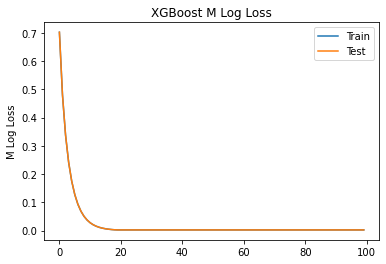

In [97]:
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('M Log Loss')
pyplot.title('XGBoost M Log Loss')
pyplot.show()

### Random Forest

In [50]:
rf= RandomForestClassifier(random_state=1)

<b>Splitting data

In [103]:
X_train, X_test, y_train, y_test = train_test_split(resampled_X, resampled_y, test_size = 0.2)

In [104]:
X_train_Less=X_train.head(10000)
Y_train_Less=y_train.head(10000)
X_test_Less=X_test.head(3000)
Y_test_Less=y_test.head(3000)

In [130]:
def model_building(estimator, grid, train_X, train_Y, test_X, test_Y):
    model = GridSearchCV(estimator, grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=True).fit(train_X, train_Y)
    print('ML Technique', estimator)
    print('--'*50)
    print(model.best_params_)
    print(model.best_score_)
  
    print('--'*50)
    print('Train classification report', metrics.classification_report(train_Y, model.predict(train_X)))
    print('Test classification report', metrics.classification_report(test_Y, model.predict(test_X)))


In [131]:
grid={

'max_depth': [20, 25],

'min_samples_leaf': [3, 4],

'min_samples_split': [100,300]
     }
model_building(RandomForestClassifier(),grid,X_train_Less,Y_train_Less,X_test_Less,Y_test_Less)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
ML Technique RandomForestClassifier()
----------------------------------------------------------------------------------------------------
{'max_depth': 25, 'min_samples_leaf': 3, 'min_samples_split': 300}
1.0
----------------------------------------------------------------------------------------------------
Train classification report               precision    recall  f1-score   support

           1       1.00      1.00      1.00      3371
           2       1.00      1.00      1.00      3288
           3       1.00      1.00      1.00      3341

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Test classification report               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1001
           2       1.00      1.00      1.00      1009
           3       1.00      

In [132]:
model=RandomForestClassifier(max_depth=20,min_samples_leaf=3,min_samples_split=300, n_jobs=-1).fit(X_train_Less, Y_train_Less)

In [133]:
Predicted_Df=pd.concat([pd.Series(model.predict(X_test.tail(5000))),pd.Series(y_test.tail(5000).values)],axis=1)
Predicted_Df.rename(columns={0:'Predicted',1:'Original'},inplace=True)

In [134]:
Predicted_Df

,Predicted,Original
0,2,2
1,2,2
2,1,1
3,3,3
4,3,3
...,...,...
4995,1,1
4996,3,3
4997,3,3
4998,1,1


In [117]:
New_DF=X_test.tail(5000)

In [136]:
New_DF['Original_Prob']=Predicted_Df.Original.values
New_DF['Predicted_Prob']=Predicted_Df.Predicted.values
New_DF

C:\Users\VVLG\AppData\Local\Temp/ipykernel_19476/1887586448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_DF['Original_Prob']=Predicted_Df.Original.values
C:\Users\VVLG\AppData\Local\Temp/ipykernel_19476/1887586448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_DF['Predicted_Prob']=Predicted_Df.Predicted.values


,Product_Description,Product_Category,Quantity,Coupon_Code,Discount_pct,Invoice_Value,Gender,Tenure_Months,Location_Chicago,Location_New_Jersey,Location_New_York,Location_Washington_DC,Predicted_Prob,Original_Prob
139130,308,12,1,14,30,11479.000000,0,5,0,0,1,0,2,2
298085,286,14,6,38,30,1305.840000,0,45,0,0,1,0,2,2
465566,359,14,1,38,30,44.500000,0,13,0,0,0,0,1,1
589961,313,12,5,14,30,31006.700000,1,8,0,1,0,0,3,3
577118,308,12,2,14,30,22952.000000,0,42,0,0,1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593608,227,2,1,40,20,858.304000,0,29,0,0,1,0,1,1
876842,299,10,1,32,30,14633.000000,1,16,0,0,1,0,3,3
891620,292,14,30,36,10,26136.817971,0,30,0,0,0,0,3,3
622848,223,3,1,3,10,864.258000,1,49,1,0,0,0,1,1


New_DF.to_csv('Data_For_Cross_Selling_And_Others.csv')

<font color=Red><h3><u>Note:</u><br><br>Data used here has 10000 for train and 3000 for test because the actual train and test data were more than 100000 records and I wasn't able to run the model. The best models after fitting the less records is Random Forest Classifier, so we now can use Random Forest Classifier for the classification problem.